# Week 1: Our Approach to Modelling Data
## [Peter Hurley](http://www.sussex.ac.uk/profiles/188689) and [Phil Rooney](http://www.sussex.ac.uk/profiles/252374) 
### Astronomy Centre, Maths and Physical Sciences

# Examples
-----------------

## Single Variable

<img src="https://astronomy.sussex.ac.uk/~pr83/onevar.png" />



In [41]:

import pystan
import numpy as np
import seaborn as sns
from astropy.table import Table
%matplotlib inline


one_var_model = """

// Inferring a Rate
data { 
  int<lower=1> n; 
  int<lower=0> k;
} 
parameters {
  real<lower=0,upper=1> theta;
} 
model {
  // Prior Distribution for Rate Theta
  theta ~ beta(1, 1);
  
  // Observed Counts
  k ~ binomial(n, theta);
}
"""

k = 9
n = 20

k = 407
n = 800

input_data = {'k':k, 'n':n}

fit_onevar = pystan.stan(model_code=one_var_model, data=input_data, iter=10000, chains=4)


fit_onevar



Inference for Stan model: anon_model_08f3dae424b59a035b3b9af363c1083c.
4 chains, each with iter=10000; warmup=5000; thin=1; 
post-warmup draws per chain=5000, total post-warmup draws=20000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
theta   0.51  2.7e-4   0.02   0.47    0.5   0.51   0.52   0.54 4240.0    1.0
lp__  -556.2 10.0e-3   0.69 -558.2 -556.4 -556.0 -555.8 -555.7 4814.0    1.0

Samples were drawn using NUTS(diag_e) at Mon Jul 18 13:35:51 2016.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

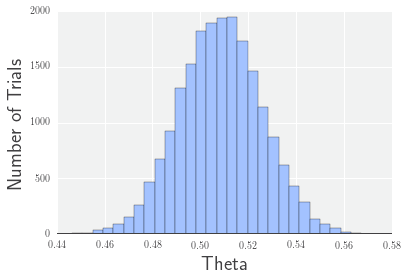

In [42]:

from __future__ import unicode_literals

import matplotlib as mpl
mpl.rcParams['text.usetex']=True
mpl.rcParams['text.latex.unicode']=True

import csv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

samples=fit_onevar.extract(permuted=False, inc_warmup=False)
samples=samples[:,:,0].reshape(samples.shape[0]*samples.shape[1])

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

ax1.hist(samples, 30, color='#A3C2FF')
ax1.set_axis_bgcolor('#F1F2F2')
ax1.tick_params(axis="y", labelcolor="b")
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.tick_params(axis='x', colors='#414042', labelcolor='#414042')
ax1.tick_params(axis='y', colors='#414042',labelcolor='#414042')
ax1.yaxis.label.set_color('#414042')
ax1.xaxis.label.set_color('#414042')
# Only show ticks on the left and bottom spines
ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')
ax1.axhline(color='#414042', linewidth=2)

plt.ylabel('Number of Bins)', color='#414042')
ax1.spines['top'].set_color('red')

plt.ylabel('Number of Trials', fontsize=20)
plt.xlabel('Theta', fontsize=20)

plt.show()


## Schools 

## Pearson Product Moment Correlation ##

<img src="https://astronomy.sussex.ac.uk/~pr83/pearson_corr.png" />



In [45]:
pearson_model = """
// Pearson Correlation
data { 
  int<lower=0> n;
  vector[2] x[n];
}
parameters {
  vector[2] mu;
  vector<lower=0>[2] lambda;
  real<lower=-1,upper=1> r;
} 
transformed parameters {
  vector<lower=0>[2] sigma;
  cov_matrix[2] T;
  // Reparameterization
  sigma[1] <- inv_sqrt(lambda[1]);
  sigma[2] <- inv_sqrt(lambda[2]);
  T[1,1] <- square(sigma[1]);
  T[1,2] <- r * sigma[1] * sigma[2];
  T[2,1] <- r * sigma[1] * sigma[2];
  T[2,2] <- square(sigma[2]);
}
model {
  // Priors
  mu ~ normal(0, inv_sqrt(.001));
  lambda ~ gamma(.001, .001);
  
  // Data
  x ~ multi_normal(mu, T);
}
"""

#pearson_data = np.matrix([[.8,102], [1.0,98], [.5,100], [.9,105], [.7,103], [.4,110], [1.2,99], [1.4,87], [.6,113], [1.1,89], [1.3,93]])
pearson_data = np.matrix([[.8,102,],[1.0,98,],[.5,100,],[.9,105,],[.7,103,],[.4,110,],[1.2,99,],[1.4,87,],[.6,113,],[1.1,89,],[1.3,93,],[.8,102,],[1.0,98,],[.5,100,],[.9,105,],[.7,103,],[.4,110,],[1.2,99,],[1.4,87,],[.6,113,],[1.1,89,],[1.3,93]])
#n = 11
n = 22
parameters ={"r", "mu", "sigma"}

data = {'x':pearson_data, 'n':n}

samples_pearson = pystan.stan(model_code=pearson_model, data=data, iter=10000, chains=4)

samples_pearson

Inference for Stan model: anon_model_cbdffd142e6b5f7643dd9a16a8322d7b.
4 chains, each with iter=10000; warmup=5000; thin=1; 
post-warmup draws per chain=5000, total post-warmup draws=20000.

            mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu[0]       0.91  1.1e-3   0.07   0.77   0.86   0.91   0.96   1.05 4159.0    1.0
mu[1]      99.59    0.03   1.75   96.1  98.46  99.58 100.73 103.01 4141.0    1.0
lambda[0]   9.85    0.05   2.98   4.83   7.75   9.57  11.66  16.49 4320.0    1.0
lambda[1]   0.02  7.9e-5 5.1e-3 8.2e-3   0.01   0.02   0.02   0.03 4199.0    1.0
r          -0.76  1.5e-3   0.09   -0.9  -0.83  -0.78  -0.71  -0.54 3931.0    1.0
sigma[0]    0.33  8.4e-4   0.05   0.25   0.29   0.32   0.36   0.45 4019.0    1.0
sigma[1]    8.03    0.02    1.3   5.96   7.11   7.87   8.76  11.02 3853.0    1.0
T[0,0]      0.11  6.1e-4   0.04   0.06   0.09    0.1   0.13   0.21 3913.0    1.0
T[1,0]     -2.09    0.01   0.81   -4.1  -2.47  -1.94  -1.54  -0.98 3092.0    1.0

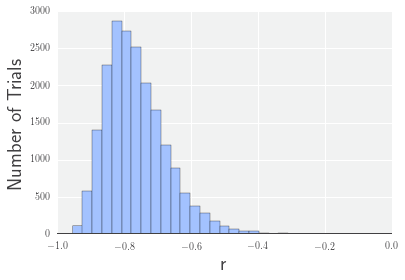

In [46]:

samples=samples_pearson.extract(permuted=False, inc_warmup=False)
samples=samples[:,:,4].reshape(samples.shape[0]*samples.shape[1])

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

ax1.hist(samples, 30, color='#A3C2FF')
ax1.set_axis_bgcolor('#F1F2F2')
ax1.tick_params(axis="y", labelcolor="b")
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.tick_params(axis='x', colors='#414042', labelcolor='#414042')
ax1.tick_params(axis='y', colors='#414042',labelcolor='#414042')
ax1.yaxis.label.set_color('#414042')
ax1.xaxis.label.set_color('#414042')
# Only show ticks on the left and bottom spines
ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')
ax1.axhline(color='#414042', linewidth=2)

plt.ylabel('Number of Bins)', color='#414042')
ax1.spines['top'].set_color('red')

plt.ylabel('Number of Trials', fontsize=20)
plt.xlabel('r', fontsize=20)

plt.show()

$\kappa$ Values

<img src="https://astronomy.sussex.ac.uk/~pr83/kappa.png" />



In [26]:
kappa_model ="""
// Kappa Coefficient of Agreement
data { 
  int<lower=0> y[4];
}
parameters {
  // Underlying Rates
  // Rate Objective Method Decides 'one'
  real<lower=0,upper=1> alpha;
  // Rate Surrogate Method Decides 'one' When Objective Method Decides 'one'
  real<lower=0,upper=1> beta;
  // Rate Surrogate Method Decides 'zero' When Objective Method Decides 'zero'
  real<lower=0,upper=1> gamma;
} 
transformed parameters {
  simplex[4] pi;
  real xi;
  real psi;
  real kappa;
  // Probabilities For Each Count
  pi[1] <- alpha * beta;
  pi[2] <- alpha * (1 - beta);
  pi[3] <- (1 - alpha) * (1 - gamma);
  pi[4] <- (1 - alpha) * gamma;
    
  // Derived Measures   
  // Rate Surrogate Method Agrees With the Objective Method
  xi <- alpha * beta + (1 - alpha) * gamma ;
  // Rate of Chance Agreement
  psi <- (pi[1] + pi[2]) * (pi[1] + pi[3]) + (pi[2] + pi[4]) * (pi[3] + pi[4]);  
  // Chance-Corrected Agreement
  kappa <- (xi - psi) / (1 - psi);
}
model {
  alpha ~ beta(1, 1);  // could be removed
  beta ~ beta(1, 1);  // could be removed
  gamma ~ beta(1, 1);  // could be removed
  // Count Data     
  y ~ multinomial(pi);
}
"""
# CHOOSE a data set:
# Influenza 
#y = [14., 4., 5., 210.]
# Rare Disease
y = [0, 0, 13, 157]

data = {'y':y}

samples_kappa = pystan.stan(model_code=kappa_model, data=data, iter=10000, chains=4)

samples_kappa

Inference for Stan model: anon_model_730a353f049501aac63c4de3fe0e0a30.
4 chains, each with iter=10000; warmup=5000; thin=1; 
post-warmup draws per chain=5000, total post-warmup draws=20000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
alpha 5.8e-3  7.7e-5 5.7e-3 1.5e-4 1.7e-3 4.1e-3 8.0e-3   0.02 5576.0    1.0
beta    0.49  4.0e-3   0.29   0.02   0.24   0.49   0.75   0.98 5390.0    1.0
gamma   0.92  3.0e-4   0.02   0.87   0.91   0.92   0.93   0.95 5026.0    1.0
pi[0] 2.9e-3  5.2e-5 3.8e-3 2.3e-5 4.9e-4 1.6e-3 3.8e-3   0.01 5305.0    1.0
pi[1] 2.9e-3  5.1e-5 3.7e-3 2.6e-5 5.2e-4 1.6e-3 3.9e-3   0.01 5212.0    1.0
pi[2]   0.08  2.9e-4   0.02   0.04   0.07   0.08   0.09   0.13 5037.0    1.0
pi[3]   0.91  3.0e-4   0.02   0.87    0.9   0.91   0.93   0.95 5018.0    1.0
xi      0.92  3.0e-4   0.02   0.87    0.9   0.92   0.93   0.95 5015.0    1.0
psi     0.91  3.1e-4   0.02   0.86    0.9   0.91   0.93   0.95 5041.0    1.0
kappa   0.05  9.2e-4   0.07-6.2e-3 6.8e

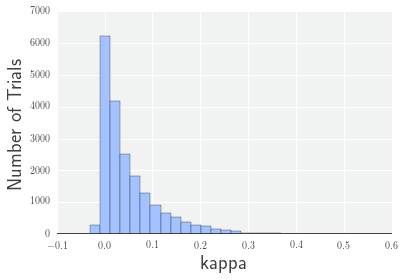

In [27]:
samples=samples_kappa.extract(permuted=False, inc_warmup=False)
samples=samples[:,:,9].reshape(samples.shape[0]*samples.shape[1])

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

ax1.hist(samples, 30, color='#A3C2FF')
ax1.set_axis_bgcolor('#F1F2F2')
ax1.tick_params(axis="y", labelcolor="b")
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.tick_params(axis='x', colors='#414042', labelcolor='#414042')
ax1.tick_params(axis='y', colors='#414042',labelcolor='#414042')
ax1.yaxis.label.set_color('#414042')
ax1.xaxis.label.set_color('#414042')
# Only show ticks on the left and bottom spines
ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')
ax1.axhline(color='#414042', linewidth=2)

plt.ylabel('Number of Bins)', color='#414042')
ax1.spines['top'].set_color('red')

plt.ylabel('Number of Trials', fontsize=20)
plt.xlabel('kappa', fontsize=20)

plt.show()

In [28]:
y = [0., 0., 13., 157.]
n = sum(y)
p0 = (y[0]+y[3])/n
pe = (((y[0]+y[1]) * (y[0]+y[2])) + ((y[1]+y[3]) * (y[2]+y[3]))) / (n*n)
kappa_Cohen = (p0-pe) / (1-pe) 
kappa_Cohen

0.0

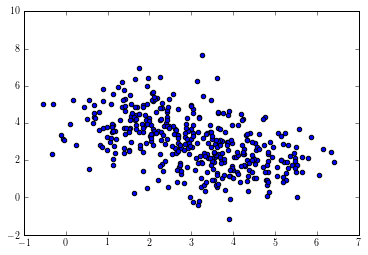

In [16]:
import numpy as np
import pylab as plt 
%matplotlib inline

G1=np.random.multivariate_normal([2,4],[[1,0],[0,1]],200)
G2=np.random.multivariate_normal([4,2],[[1,0],[0,1]],200)
data=np.concatenate((G1,G2))
plt.scatter(data[:,0],data[:,1])

In [59]:
model="""
data {

  int<lower=1> D;
  int<lower=1> K;
  int<lower=1> N;
  vector[D] y[N]; //observations
}

parameters {
  simplex[K] theta;
  vector[D] mu[K];
  real<lower=0,upper=10> sigma[K];  // scales of mixture components
}

model {
  real ps[K];
  for (k in 1:K) {

    mu[k] ~ normal(0,10);
  }

  for (n in 1:N){
  for(k in 1:K){

    ps[k] <- log(theta[k])
    + normal_log(y[n],mu[k],sigma[k]);
}

    increment_log_prob(log_sum_exp(ps));
  }
}
"""

In [60]:
import pystan
sm = pystan.StanModel(model_code=model)


In [65]:
GMMdata={
    'D':2,
    'K':2,
    'N':400,
    'y':data
}

In [68]:
fit = sm.sampling(data=GMMdata,iter=1000, chains=1)

In [69]:
print fit

Inference for Stan model: anon_model_d7a05c9f98b0bd755c75155d804c7f5a.
1 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=500.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
theta[0]   0.48  4.1e-3   0.04   0.39   0.45   0.48   0.51   0.57  116.0    1.0
theta[1]   0.52  4.1e-3   0.04   0.43   0.49   0.52   0.55   0.61  116.0    1.0
mu[0,0]    2.01  9.8e-3   0.11    1.8   1.94   2.01   2.09   2.22  126.0    1.0
mu[1,0]    3.96  8.6e-3    0.1   3.76    3.9   3.96   4.02   4.16  121.0    1.0
mu[0,1]    4.01    0.01   0.11   3.78   3.94    4.0   4.09   4.24  123.0    1.0
mu[1,1]    2.02  8.6e-3    0.1   1.83   1.96   2.02   2.09    2.2  124.0    1.0
sigma[0]   1.05  4.9e-3   0.05   0.96   1.02   1.05   1.09   1.16  121.0    1.0
sigma[1]   1.01  4.3e-3   0.05   0.92   0.97   1.01   1.04    1.1  118.0    1.0
lp__      -1349    0.17   1.85  -1354  -1350  -1349  -1348  -1346  113.0    1.0

Samples were 

In [70]:
samples=fit.extract(permuted=False, inc_warmup=False)

[0.5458490399648471, 1.091698079929167, 4.912641359683624, 18.558867358803749]


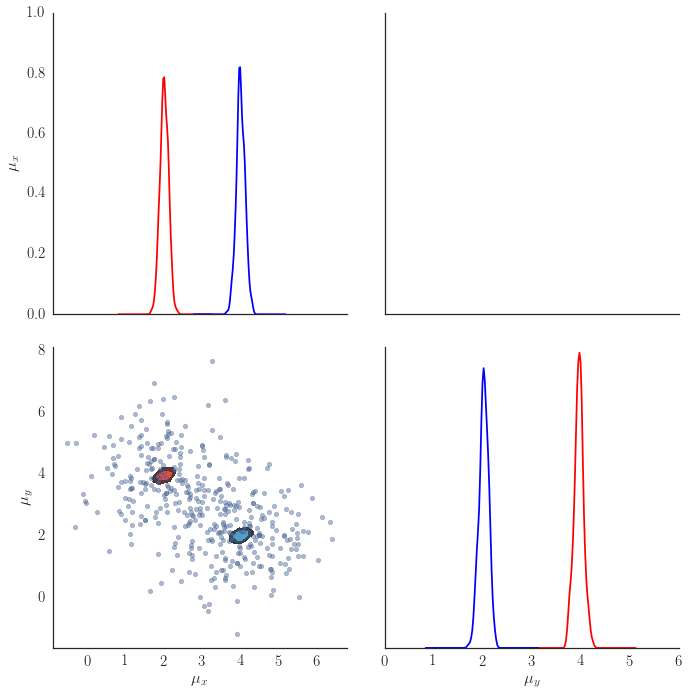

In [88]:
import seaborn as sns
sns.set(color_codes=True,font_scale=1.5)
import pandas as pd
sns.set_style("white")



s1=2
s2=3
import scipy
# Make a 2d normed histogram
H,xedges,yedges=np.histogram2d(samples[:,:,[s1]].reshape(samples.shape[0]*samples.shape[1]),samples[:,:,[s2]].reshape(samples.shape[0]*samples.shape[1]),bins=10,normed=True)

norm=H.sum() # Find the norm of the sum
# Set contour levels
contour1=0.99
contour2=0.95
contour3=0.68

# Set target levels as percentage of norm
target1 = norm*contour1
target2 = norm*contour2
target3 = norm*contour3

# Take histogram bin membership as proportional to Likelihood
# This is true when data comes from a Markovian process
def objective(limit, target):
    w = np.where(H>limit)
    count = H[w]
    return count.sum() - target

# Find levels by summing histogram to objective
level1= scipy.optimize.bisect(objective, H.min(), H.max(), args=(target1,))
level2= scipy.optimize.bisect(objective, H.min(), H.max(), args=(target2,))
level3= scipy.optimize.bisect(objective, H.min(), H.max(), args=(target3,))

# For nice contour shading with seaborn, define top level
level4=H.max()
levels=[level1,level2,level3,level4]

print levels

labels=[r'$\mu_x$',r'$\mu_y$']
df = pd.DataFrame(samples[:,:,[s1,s2]].reshape(samples.shape[0]*samples.shape[1],2),columns=labels)
g = sns.PairGrid(df,size=5)
g.map_diag(sns.kdeplot,c='Red')
g.map_lower(sns.kdeplot, cmap="Reds_d",alpha=1,n_levels=levels,normed=True,shade=True,zorder=1)

#g.set(ylim=(-1,3))
#g.set(xlim=(-1,3))
s1=4
s2=5

# Make a 2d normed histogram
H,xedges,yedges=np.histogram2d(samples[:,:,[s1]].reshape(samples.shape[0]*samples.shape[1]),samples[:,:,[s2]].reshape(samples.shape[0]*samples.shape[1]),bins=10,normed=True)

norm=H.sum() # Find the norm of the sum
# Set contour levels
contour1=0.99
contour2=0.95
contour3=0.68

# Set target levels as percentage of norm
target1 = norm*contour1
target2 = norm*contour2
target3 = norm*contour3

# Take histogram bin membership as proportional to Likelihood
# This is true when data comes from a Markovian process
def objective(limit, target):
    w = np.where(H>limit)
    count = H[w]
    return count.sum() - target

# Find levels by summing histogram to objective
level1= scipy.optimize.bisect(objective, H.min(), H.max(), args=(target1,))
level2= scipy.optimize.bisect(objective, H.min(), H.max(), args=(target2,))
level3= scipy.optimize.bisect(objective, H.min(), H.max(), args=(target3,))

# For nice contour shading with seaborn, define top level
level4=H.max()
levels=[level1,level2,level3,level4]

g.data=pd.DataFrame(samples[:,:,[s1,s2]].reshape(samples.shape[0]*samples.shape[1],2),columns=labels)
g.map_diag(sns.kdeplot,c='Blue')
g.map_lower(sns.kdeplot, cmap="Blues_d",alpha=1,n_levels=levels,normed=True,shade=True,zorder=1)
g.axes[1,0].scatter(data[:,0],data[:,1],alpha=0.5)


